<a href="https://colab.research.google.com/github/EmeraldMath/Tensorflow_models/blob/master/tf_keras_regression_model_wide_and_deep_subclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%tensorflow_version 2.x
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.5
pandas 0.25.3
sklearn 0.22.1
tensorflow 2.1.0
tensorflow_core.keras 2.2.4-tf


In [7]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [8]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7) #default test_size = 0.25
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [13]:
# subclass API

class WideDeepModel(keras.models.Model):
    def __init__(self):
        super(WideDeepModel, self).__init__()
        '''define model architecture'''
        self.hidden1_layer = keras.layers.Dense(30, activation='relu')
        self.hidden2_layer = keras.layers.Dense(30, activation='relu')
        self.output_layer = keras.layers.Dense(1)

    def call(self, input):
      '''forward feed'''
      hidden1 = self.hidden1_layer(input)
      hidden2 = self.hidden2_layer(hidden1)
      concat = keras.layers.concatenate([input, hidden2])
      output = self.output_layer(concat)
      return output
model = WideDeepModel()
# following is an alternative way of model = WideDeepModel()
# it will give different output of model.summary()
'''
model = keras.models.Sequential([
    WideDeepModel(),
])
'''
# None is #samples, 8 is #input features
model.build(input_shape=(None, 8))


model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta = 1e-2)]

Model: "wide_deep_model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              multiple                  270       
_________________________________________________________________
dense_10 (Dense)             multiple                  930       
_________________________________________________________________
dense_11 (Dense)             multiple                  39        
Total params: 1,239
Trainable params: 1,239
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 93us/sample - loss: 1.0143 - val_loss: 0.5711
Epoch 2/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.4574 - val_loss: 0.4350
Epoch 3/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.4025 - val_loss: 0.4070
Epoch 4/100
11610/11610 [==============================] - 1s 65us/sample - loss: 0.3854 - val_loss: 0.4351
Epoch 5/100
11610/11610 [==============================] - 1s 65us/sample - loss: 0.3932 - val_loss: 0.3936
Epoch 6/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.3746 - val_loss: 0.3755
Epoch 7/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3623 - val_loss: 0.3663
Epoch 8/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3546 - val_loss: 0.3618
Epoch 9/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.349

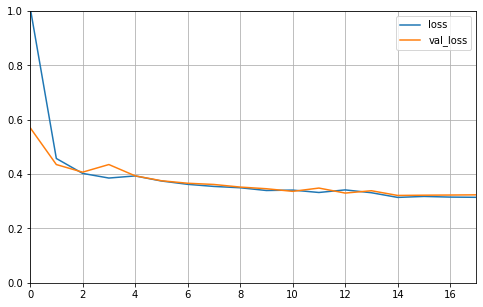

In [15]:
def plot_learning_curves(history):
  pd.DataFrame(history.history).plot(figsize = (8,5))
  plt.grid(True)
  plt.gca().set_ylim(0,1)
  plt.show()
plot_learning_curves(history)

In [16]:
model.evaluate(x_test_scaled, y_test)

5160/5160 [==============================] - 0s 33us/sample - loss: 0.3282


0.3282101468522419

In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir callbacks